## Generalizing, Overfitting and Underfitting

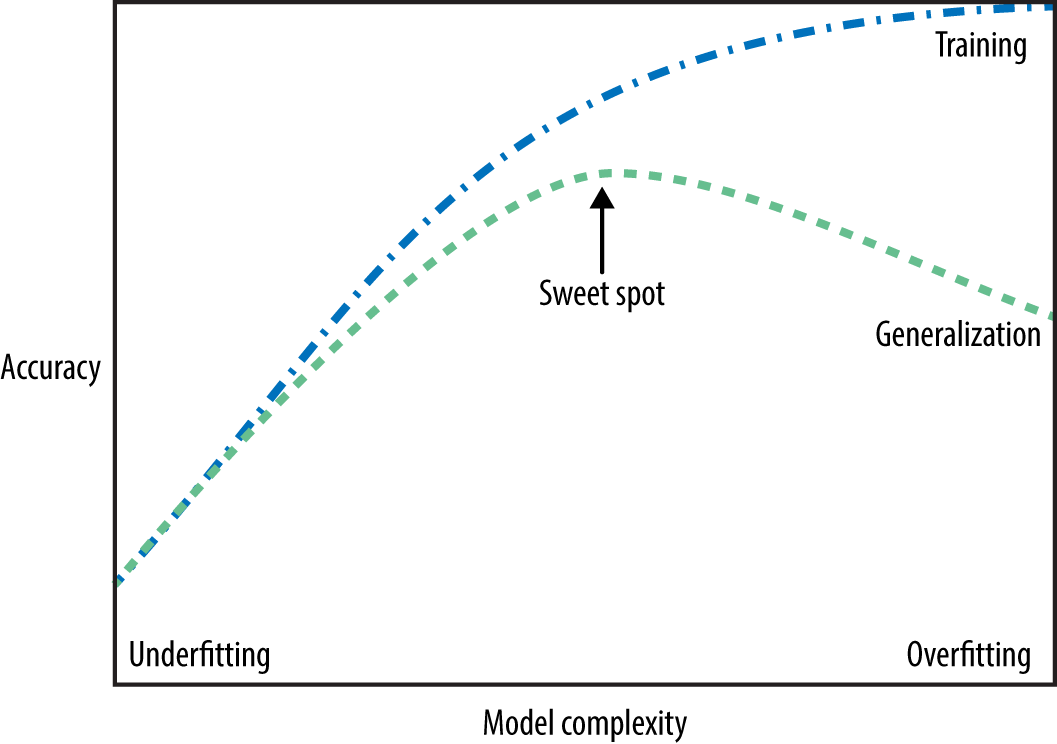

In [4]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

X.shape: (26, 2)


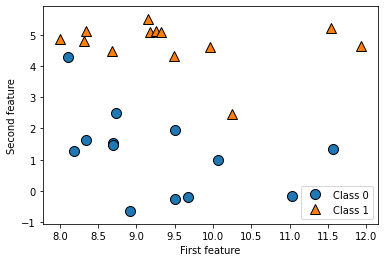

In [5]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

## k-Nearest Neighbours

### k-Neighbours classification

In its simplest version, the k-NN algorithm only considers exactly one nearest neighbor,
which is the closest training data point to the point we want to make a prediction
for. The prediction is then simply the known output for this training point

Text(0.5, 1.0, 'One-nearest-neighbour')

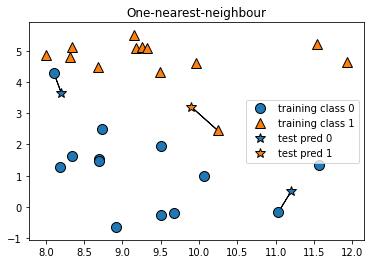

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.title("One-nearest-neighbour")

Text(0.5, 1.0, 'Three-nearest-neighbour')

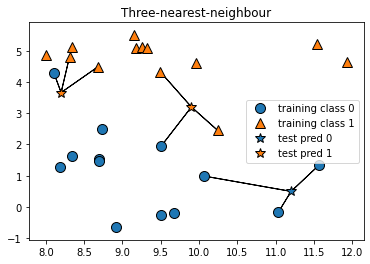

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.title("Three-nearest-neighbour")

In [10]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [13]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [18]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


#### Analyzing KNNClassifier

    For two-dimensional datasets, we can also illustrate the prediction for all possible test points in the xy-plane. We color the plane according to the class that would be assigned to a point in this region. This lets us view the decision boundary, which is the divide between where the algorithm assigns class 0 versus where it assigns class 1.

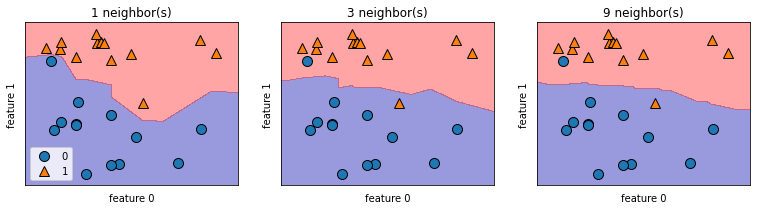

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(13, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
# the fit method returns the object self, so we can instantiate
# and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend(loc=3)

*Decision boundaries created by the nearest neighbors model for different values
of n_neighbors*

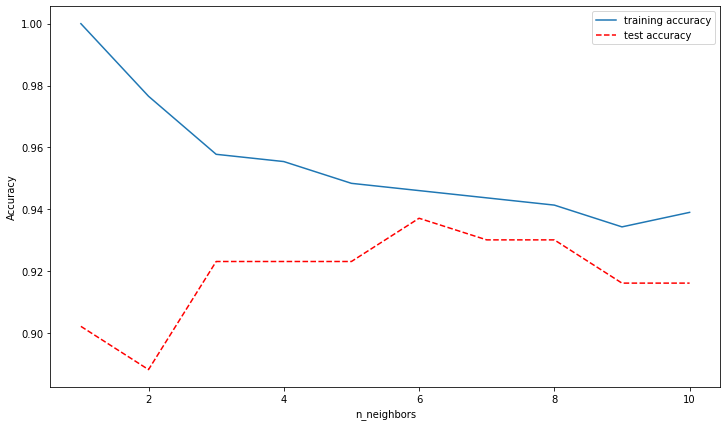

In [42]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.figure(figsize=(12,7))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy", ls='--', color='red')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

### k-Neighbours regression

Text(0.5, 1.0, 'One-nearest-neighbour')

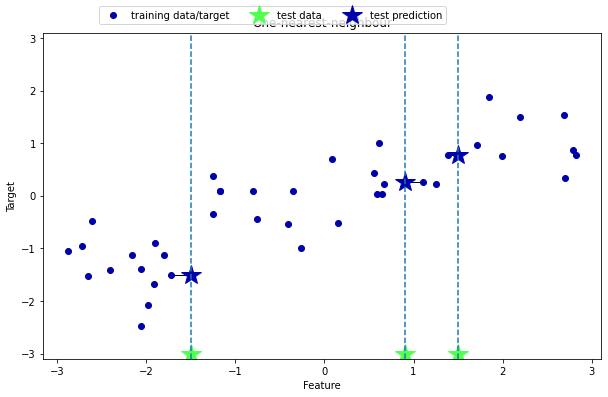

In [45]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.title("One-nearest-neighbour")

<p align="center">There is also a regression variant of the k-nearest neighbors algorithm. Again, let’s start by using the single nearest neighbor, this time using the wave dataset. We’ve added three test data points as green stars on the x-axis. The prediction using a single neighbor is just the target value of the nearest neighbor.</p>

Text(0.5, 1.0, 'Three-nearest-neighbour')

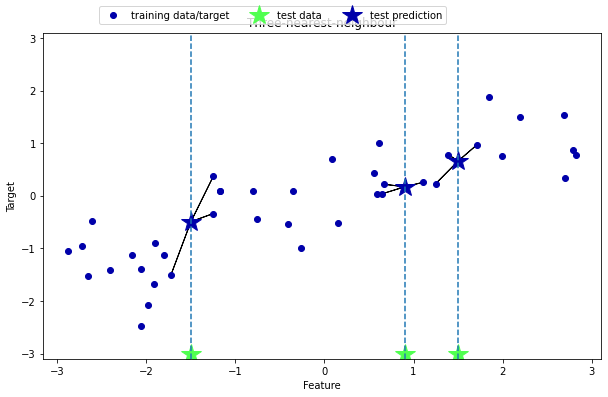

In [46]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.title("Three-nearest-neighbour")

In [47]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [48]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [49]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### Analyzing KNNRegressor

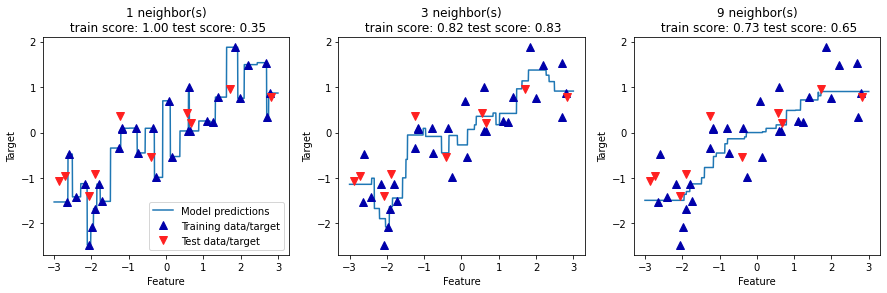

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
"Test data/target"], loc="best");

In principle, there are two important parameters to the KNeighbors classifier: the
**number of neighbors** and how you measure **distance** between data points. In practice,
using a small number of neighbors like three or five often works well, but you should
certainly adjust this parameter. Choosing the right distance measure is somewhat
beyond the scope of this book. By default, **Euclidean distance** is used, which works
well in many settings.

One of the strengths of k-NN is that the model is very easy to understand, and often
gives reasonable performance without a lot of adjustments. Using this algorithm is a
good baseline method to try before considering more advanced techniques. Building
the nearest neighbors model is usually very fast, but when your training set is very
large (either in number of features or in number of samples) prediction can be slow.
When using the k-NN algorithm, it’s important to preprocess your data. This approach often does not perform well on datasets with many features
(hundreds or more), and it does particularly badly with datasets where most features
are 0 most of the time (so-called sparse datasets).

So, while the nearest k-neighbors algorithm is *easy to understand*, it is not often used
in practice, due to prediction being slow and its inability to handle many features.